# Introduction

Our image pieces are targeted to be taken in indoor environments and by common cell phone cameras.
As an indoor environment has limited numer of light sources and cell phone cameras tune the exposure automatically according to the brightness of the scene, there are many differences in brightness/contrast or even in color between adjacent image pieces.

In this experiment, we test and determin how to compensate the camera exposures through overall image pieces.

In [1]:
import copy
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

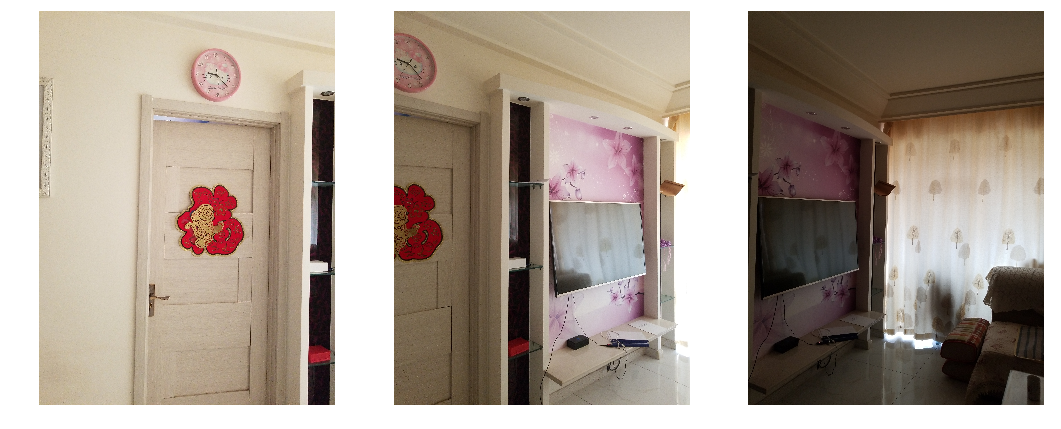

In [2]:
folder = '../images/grid-home/'
img_names = ['img-r1-288.jpg', 'img-r1-312.jpg', 'img-r1-336.jpg']
imgs = [cv.cvtColor(cv.imread(folder + fn), cv.COLOR_BGR2RGB) for fn in img_names]
h, w, _ = imgs[0].shape

_, ax = plt.subplots(1, 3, figsize=(18, 8))
for idx in range(3):
    ax[idx].imshow(imgs[idx])
    ax[idx].axis('off')
plt.show()

orig_images = copy.deepcopy(imgs)

They are 3 adjacent image frames. Their contrast/brightness are strikingly different from each other.

## CHANNELS_BLOCKS

In [3]:
corners = [(0, 0), (762, 0), (1512, 0)]
mask = np.ones((h, w), np.float) * 255
masks = [mask, mask, mask]

In [4]:
compensator=cv.detail.ExposureCompensator_createDefault(cv.detail.ExposureCompensator_CHANNELS_BLOCKS)
compensator.feed(corners=corners, images=imgs, masks=masks)

for idx in range(3):
    compensator.apply(idx, corners[idx], imgs[idx], masks[idx])

error: OpenCV(4.1.0) /io/opencv/modules/core/src/alloc.cpp:55: error: (-4:Insufficient memory) Failed to allocate 10316224800 bytes in function 'OutOfMemoryError'


It seems not working... :(

## CHANNELS

In [5]:
imgs = copy.deepcopy(orig_images)

compensator = cv.detail_ChannelsCompensator(1)
compensator.feed(corners=corners, images=imgs, masks=masks)

for idx in range(3):
    compensator.apply(idx, corners[idx], imgs[idx], masks[idx])

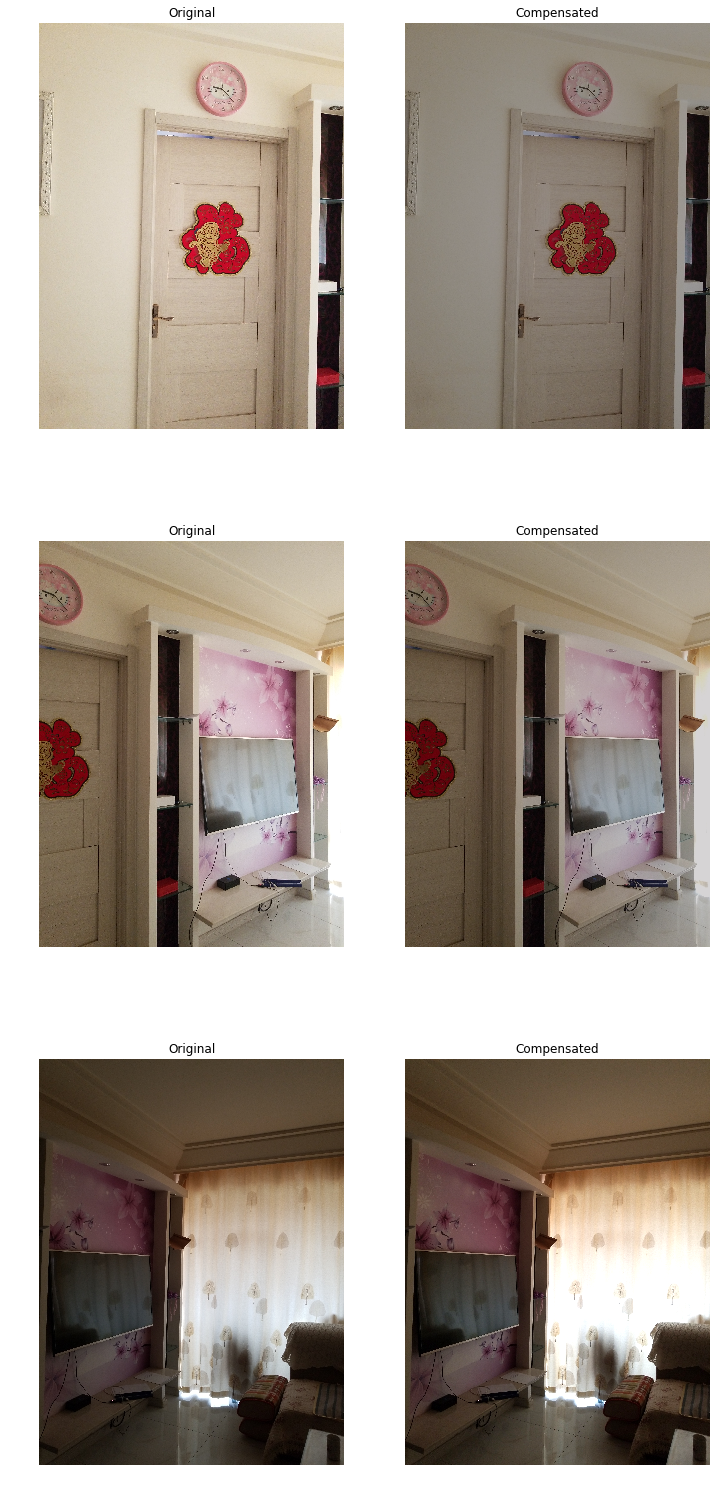

In [6]:
_, ax = plt.subplots(3, 2, figsize=(12, 27))
for idx in range(3):
    ax[idx][0].imshow(orig_images[idx])
    ax[idx][0].axis('off')
    ax[idx][0].set_title('Original')
    ax[idx][1].imshow(imgs[idx])
    ax[idx][1].axis('off')
    ax[idx][1].set_title('Compensated')
plt.show()

## Result OK
The first and second images were darkened and the last one was lightened.